# IMDB Reviews Classification

## Simple RNN

In [ ]:
# Using only Numpy
import numpy as np

timesteps = 100
input_features = 32
output_features = 64

inputs = np.random.random((timesteps, input_features))

state_t = np.zeros((output_features,))

W = np.random.random((output_features, input_features))
U = np.random.random((output_features, output_features))
b = np.random.random((output_features,))

successive_outputs = []
for input_t in inputs:
    output_t = np.tanh(np.dot(W, input_t) + np.dot(U, state_t) + b)

    successive_outputs.append(output_t)

    state_t = output_t

final_output_sequence = np.concatenate(successive_outputs, axis=0)

In [ ]:
# IMDB Data preprocessing
from keras.datasets import imdb
from keras.preprocessing import sequence

max_features = 10000
maxlen = 500
batch_size = 32

print('Loading data...')
(input_train, y_train), (input_test, y_test) = imdb.load_data(
    num_words=max_features)
print(len(input_train), 'train sequences')
print(len(input_test), 'test sequences')

print('Pad sequences (samples x time)')
input_train = sequence.pad_sequences(input_train, maxlen=maxlen)
input_test = sequence.pad_sequences(input_test, maxlen=maxlen)

print('input_train shape:', input_train.shape)
print('input_test shape:', input_test.shape)

Loading data...
17473536/17464789 [==============================] - 0s 0us/step
25000 train sequences
25000 test sequences
Pad sequences (samples x time)
input_train shape: (25000, 500)
input_test shape: (25000, 500)


In [ ]:
from keras.models import Sequential
from keras.layers import Embedding, SimpleRNN, Dense

model = Sequential()
model.add(Embedding(max_features, 32))
model.add(SimpleRNN(32))
model.add(Dense(1, activation='sigmoid'))

model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
embedding (Embedding)        (None, None, 32)          320000    
_________________________________________________________________
simple_rnn (SimpleRNN)       (None, 32)                2080      
_________________________________________________________________
dense (Dense)                (None, 1)                 33        
Total params: 322,113
Trainable params: 322,113
Non-trainable params: 0
_________________________________________________________________


In [ ]:
model.compile(optimizer='rmsprop',
              loss='binary_crossentropy',
              metrics=['acc'])

history = model.fit(input_train, y_train,
                    epochs=10,
                    batch_size=128,
                    validation_split=0.2)

Epoch 1/10
157/157 [==============================] - 65s 392ms/step - loss: 0.6340 - acc: 0.6258 - val_loss: 0.5150 - val_acc: 0.7662
Epoch 2/10
157/157 [==============================] - 61s 391ms/step - loss: 0.3907 - acc: 0.8333 - val_loss: 0.4822 - val_acc: 0.7838
Epoch 3/10
157/157 [==============================] - 61s 389ms/step - loss: 0.2984 - acc: 0.8794 - val_loss: 0.3847 - val_acc: 0.8468
Epoch 4/10
157/157 [==============================] - 61s 389ms/step - loss: 0.2265 - acc: 0.9143 - val_loss: 0.3638 - val_acc: 0.8472
Epoch 5/10
157/157 [==============================] - 61s 389ms/step - loss: 0.1700 - acc: 0.9369 - val_loss: 0.3765 - val_acc: 0.8636
Epoch 6/10
157/157 [==============================] - 61s 389ms/step - loss: 0.1127 - acc: 0.9609 - val_loss: 0.4572 - val_acc: 0.8434
Epoch 7/10
157/157 [==============================] - 61s 391ms/step - loss: 0.0682 - acc: 0.9790 - val_loss: 0.5807 - val_acc: 0.7858
Epoch 8/10
157/157 [==============================] - 6

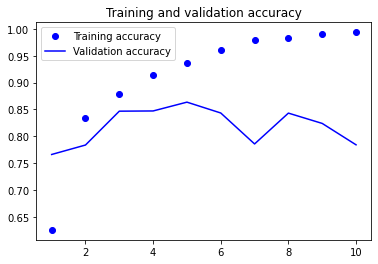

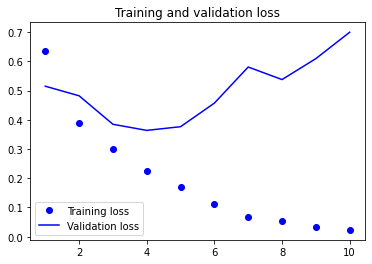

In [ ]:
import matplotlib.pyplot as plt

acc = history.history['acc']
val_acc = history.history['val_acc']
loss = history.history['loss']
val_loss = history.history['val_loss']

epochs = range(1, len(acc) + 1)

plt.plot(epochs, acc, 'bo', label='Training accuracy')
plt.plot(epochs, val_acc, 'b', label='Validation accuracy')
plt.title('Training and validation accuracy')
plt.legend()

plt.figure()

plt.plot(epochs, loss, 'bo', label='Training loss')
plt.plot(epochs, val_loss, 'b', label='Validation loss')
plt.title('Training and validation loss')
plt.legend()

plt.show()

## LSTM

In [ ]:
from keras.layers import LSTM

model = Sequential()
model.add(Embedding(max_features, 32))
model.add(LSTM(32))
model.add(Dense(1, activation='sigmoid'))

model.compile(optimizer='rmsprop',
              loss='binary_crossentropy',
              metrics=['acc'])

history = model.fit(input_train, y_train,
                    epochs=10,
                    batch_size=128,
                    validation_split=0.2)

Epoch 1/10
157/157 [==============================] - 9s 22ms/step - loss: 0.5388 - acc: 0.7483 - val_loss: 0.4156 - val_acc: 0.8332
Epoch 2/10
157/157 [==============================] - 3s 19ms/step - loss: 0.3208 - acc: 0.8728 - val_loss: 0.3093 - val_acc: 0.8780
Epoch 3/10
157/157 [==============================] - 3s 19ms/step - loss: 0.2452 - acc: 0.9053 - val_loss: 0.2999 - val_acc: 0.8860
Epoch 4/10
157/157 [==============================] - 3s 19ms/step - loss: 0.2049 - acc: 0.9247 - val_loss: 0.3093 - val_acc: 0.8698
Epoch 5/10
157/157 [==============================] - 3s 19ms/step - loss: 0.1788 - acc: 0.9352 - val_loss: 0.2924 - val_acc: 0.8760
Epoch 6/10
157/157 [==============================] - 3s 19ms/step - loss: 0.1581 - acc: 0.9426 - val_loss: 0.3143 - val_acc: 0.8822
Epoch 7/10
157/157 [==============================] - 3s 20ms/step - loss: 0.1404 - acc: 0.9500 - val_loss: 0.3038 - val_acc: 0.8880
Epoch 8/10
157/157 [==============================] - 3s 19ms/step - 

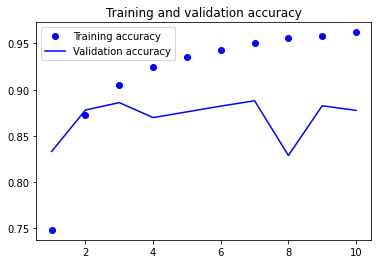

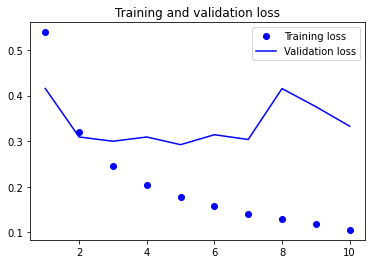

In [ ]:
import matplotlib.pyplot as plt

acc = history.history['acc']
val_acc = history.history['val_acc']
loss = history.history['loss']
val_loss = history.history['val_loss']

epochs = range(1, len(acc) + 1)

plt.plot(epochs, acc, 'bo', label='Training accuracy')
plt.plot(epochs, val_acc, 'b', label='Validation accuracy')
plt.title('Training and validation accuracy')
plt.legend()

plt.figure()

plt.plot(epochs, loss, 'bo', label='Training loss')
plt.plot(epochs, val_loss, 'b', label='Validation loss')
plt.title('Training and validation loss')
plt.legend()

plt.show()

## Reverse RNN

In [1]:
# Reverse
from keras.datasets import imdb
from keras.preprocessing import sequence
from keras.layers import Embedding, LSTM, Dense
from keras.models import Sequential

max_features = 10000
maxlen = 500

(x_train, y_train), (x_test, y_test) = imdb.load_data(num_words=max_features)

x_train = [x[::-1] for x in x_train]
x_test = [x[::-1] for x in x_test]

x_train = sequence.pad_sequences(x_train, maxlen=maxlen)
x_test = sequence.pad_sequences(x_test, maxlen=maxlen)

model = Sequential()
model.add(Embedding(max_features, 128))
model.add(LSTM(32))
model.add(Dense(1, activation='sigmoid'))

model.compile(optimizer='rmsprop',
              loss='binary_crossentropy',
              metrics=['acc'])

history = model.fit(x_train, y_train,
                    epochs=10,
                    batch_size=128,
                    validation_split=0.2)

17473536/17464789 [==============================] - 0s 0us/step
Epoch 1/10
157/157 [==============================] - 13s 39ms/step - loss: 0.5095 - acc: 0.7489 - val_loss: 0.3980 - val_acc: 0.8368
Epoch 2/10
157/157 [==============================] - 6s 36ms/step - loss: 0.3061 - acc: 0.8810 - val_loss: 0.3234 - val_acc: 0.8830
Epoch 3/10
157/157 [==============================] - 6s 36ms/step - loss: 0.2478 - acc: 0.9069 - val_loss: 0.4539 - val_acc: 0.8654
Epoch 4/10
157/157 [==============================] - 6s 36ms/step - loss: 0.2101 - acc: 0.9232 - val_loss: 0.3671 - val_acc: 0.8622
Epoch 5/10
157/157 [==============================] - 6s 36ms/step - loss: 0.1786 - acc: 0.9370 - val_loss: 0.3563 - val_acc: 0.8708
Epoch 6/10
157/157 [==============================] - 6s 36ms/step - loss: 0.1615 - acc: 0.9449 - val_loss: 0.3453 - val_acc: 0.8670
Epoch 7/10
157/157 [==============================] - 6s 36ms/step - loss: 0.1508 - acc: 0.9498 - val_loss: 0.4480 - val_acc: 0.8490
Epo

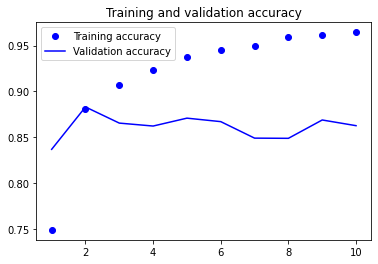

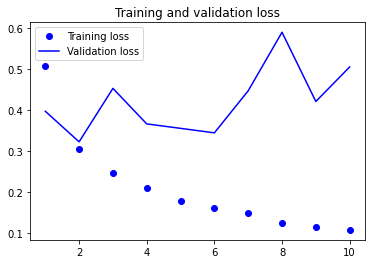

In [2]:
import matplotlib.pyplot as plt

acc = history.history['acc']
val_acc = history.history['val_acc']
loss = history.history['loss']
val_loss = history.history['val_loss']

epochs = range(1, len(acc) + 1)

plt.plot(epochs, acc, 'bo', label='Training accuracy')
plt.plot(epochs, val_acc, 'b', label='Validation accuracy')
plt.title('Training and validation accuracy')
plt.legend()

plt.figure()

plt.plot(epochs, loss, 'bo', label='Training loss')
plt.plot(epochs, val_loss, 'b', label='Validation loss')
plt.title('Training and validation loss')
plt.legend()

plt.show()

## Bidirectional LSTM

In [3]:
# Bidirectional
from keras.layers import Bidirectional

model = Sequential()
model.add(Embedding(max_features, 32))
model.add(Bidirectional(LSTM(32)))
model.add(Dense(1, activation='sigmoid'))

model.compile(optimizer='rmsprop',
              loss='binary_crossentropy',
              metrics=['acc'])

history = model.fit(x_train, y_train,
                    epochs=10,
                    batch_size=128,
                    validation_split=0.2)

Epoch 1/10
157/157 [==============================] - 13s 69ms/step - loss: 0.5516 - acc: 0.7279 - val_loss: 0.6009 - val_acc: 0.6780
Epoch 2/10
157/157 [==============================] - 10s 64ms/step - loss: 0.3407 - acc: 0.8676 - val_loss: 0.3299 - val_acc: 0.8840
Epoch 3/10
157/157 [==============================] - 10s 64ms/step - loss: 0.2679 - acc: 0.9011 - val_loss: 0.3187 - val_acc: 0.8884
Epoch 4/10
157/157 [==============================] - 10s 64ms/step - loss: 0.2257 - acc: 0.9186 - val_loss: 0.3187 - val_acc: 0.8740
Epoch 5/10
157/157 [==============================] - 10s 64ms/step - loss: 0.2005 - acc: 0.9283 - val_loss: 0.3677 - val_acc: 0.8846
Epoch 6/10
157/157 [==============================] - 10s 63ms/step - loss: 0.1772 - acc: 0.9384 - val_loss: 0.5072 - val_acc: 0.8546
Epoch 7/10
157/157 [==============================] - 10s 65ms/step - loss: 0.1644 - acc: 0.9421 - val_loss: 0.3393 - val_acc: 0.8582
Epoch 8/10
157/157 [==============================] - 10s 65ms

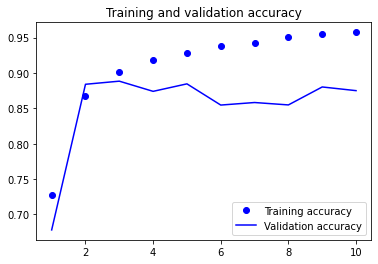

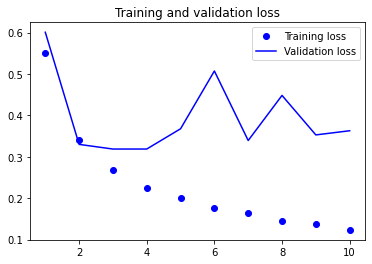

In [4]:
import matplotlib.pyplot as plt

acc = history.history['acc']
val_acc = history.history['val_acc']
loss = history.history['loss']
val_loss = history.history['val_loss']

epochs = range(1, len(acc) + 1)

plt.plot(epochs, acc, 'bo', label='Training accuracy')
plt.plot(epochs, val_acc, 'b', label='Validation accuracy')
plt.title('Training and validation accuracy')
plt.legend()

plt.figure()

plt.plot(epochs, loss, 'bo', label='Training loss')
plt.plot(epochs, val_loss, 'b', label='Validation loss')
plt.title('Training and validation loss')
plt.legend()

plt.show()

# Temperature Prediction

## Data Preprocessing

In [ ]:
!mkdir /content/drive/MyDrive/jena_climate
!cd /content/drive/MyDrive/jena_climate
!wget https://s3.amazonaws.com/keras-datasets/jena_climate_2009_2016.csv.zip
!unzip jena_climate_2009_2016.csv.zip

In [5]:
import os

data_dir = '/content/drive/MyDrive/jena_climate'
fname = os.path.join(data_dir, 'jena_climate_2009_2016.csv')

f = open(fname)
data = f.read()
f.close()

lines = data.split('\n')
header = lines[0].split(',')
lines = lines[1:]

print(header)
print(len(lines))

['"Date Time"', '"p (mbar)"', '"T (degC)"', '"Tpot (K)"', '"Tdew (degC)"', '"rh (%)"', '"VPmax (mbar)"', '"VPact (mbar)"', '"VPdef (mbar)"', '"sh (g/kg)"', '"H2OC (mmol/mol)"', '"rho (g/m**3)"', '"wv (m/s)"', '"max. wv (m/s)"', '"wd (deg)"']
420451


In [6]:
import numpy as np

float_data = np.zeros((len(lines), len(header) - 1))
for i, line in enumerate(lines):
    values = [float(x) for x in line.split(',')[1:]]
    float_data[i, :] = values

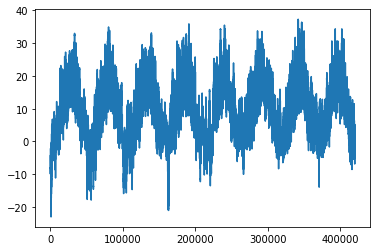

In [7]:
import matplotlib.pyplot as plt

temp = float_data[:, 1]     # temperature in Celsius
plt.plot(range(len(temp)), temp)

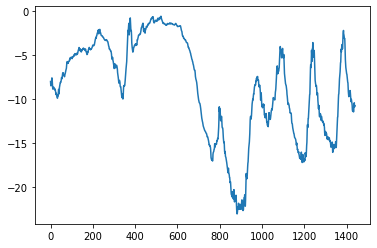

In [8]:
plt.plot(range(1440), temp[:1440])

In [9]:
lookback = 720
step = 6
delay = 144

mean = float_data[:200000].mean(axis=0)
float_data -= mean
std = float_data[:200000].std(axis=0)
float_data /= std

In [10]:
def generator(data, lookback, delay, min_index, max_index,
              shuffle=False, batch_size=128, step=6):
    if max_index is None:
        max_index = len(data - delay - 1)
    i = min_index + lookback
    while True:
        if shuffle:
            rows = np.random.randint(
                min_index + lookback, max_index, size=batch_size)
        else:
            if i + batch_size >= max_index:
                i = min_index + lookback
            rows = np.arange(i, min(i + batch_size, max_index))
            i += len(rows)

        samples = np.zeros((len(rows),
                            lookback // step,
                            data.shape[-1]))
        targets = np.zeros((len(rows),))
        for j, row in enumerate(rows):
            indices = range(rows[j] - lookback, rows[j], step)
            samples[j] = data[indices]
            targets[j] = data[rows[j] + delay][1]
        yield samples, targets

In [11]:
lookback = 1440
step = 6
delay = 144
batch_size = 128

train_gen = generator(float_data,
                      lookback,
                      delay,
                      min_index=0,
                      max_index=200000,
                      shuffle=True,
                      batch_size=batch_size,
                      step=step)

val_gen = generator(float_data,
                    lookback,
                    delay,
                    min_index=200001,
                    max_index=300000,
                    batch_size=batch_size,
                    step=step)

test_gen = generator(float_data,
                     lookback,
                     delay,
                     min_index=300001,
                     max_index=None,
                     batch_size=batch_size,
                     step=step)

val_steps = (300000 - 200001 - lookback) // batch_size
test_steps = (len(float_data) - 300001 - lookback) // batch_size

## Naive Solution without ML (using previous day's data for today)

In [8]:
def evaluate_naive_method():
    batch_maes = []
    for step in range(val_steps):
        samples, targets = next(val_gen)
        preds = samples[:, -1, 1]
        mae = np.mean(np.abs(preds - targets))
        batch_maes.append(mae)
    print(np.mean(batch_maes))

evaluate_naive_method()

0.2897359729905486


## Naive Solution with ML

In [9]:
from keras.models import Sequential
from keras.layers import Dense, Flatten
from tensorflow.keras.optimizers import RMSprop

model = Sequential()
model.add(Flatten(input_shape=(lookback // step, float_data.shape[-1])))
model.add(Dense(32, activation='relu'))
model.add(Dense(1))

model.compile(optimizer=RMSprop(),
              loss='mae')

history = model.fit(train_gen,
                    steps_per_epoch=500,
                    epochs=20,
                    validation_data=val_gen,
                    validation_steps=val_steps)

Epoch 1/20
500/500 [==============================] - 19s 37ms/step - loss: 1.3018 - val_loss: 0.6236
Epoch 2/20
500/500 [==============================] - 18s 37ms/step - loss: 0.4790 - val_loss: 0.3594
Epoch 3/20
500/500 [==============================] - 18s 37ms/step - loss: 0.2988 - val_loss: 0.3187
Epoch 4/20
500/500 [==============================] - 18s 37ms/step - loss: 0.2696 - val_loss: 0.3255
Epoch 5/20
500/500 [==============================] - 18s 37ms/step - loss: 0.2562 - val_loss: 0.3063
Epoch 6/20
500/500 [==============================] - 18s 36ms/step - loss: 0.2466 - val_loss: 0.3332
Epoch 7/20
500/500 [==============================] - 18s 36ms/step - loss: 0.2372 - val_loss: 0.3513
Epoch 8/20
500/500 [==============================] - 16s 32ms/step - loss: 0.2322 - val_loss: 0.3182
Epoch 9/20
500/500 [==============================] - 18s 37ms/step - loss: 0.2270 - val_loss: 0.3147
Epoch 10/20
500/500 [==============================] - 18s 37ms/step - loss: 0.222

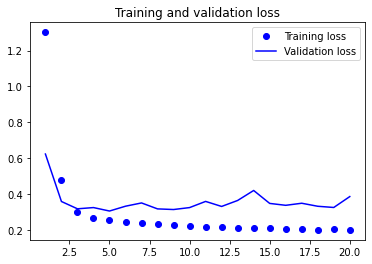

In [10]:
import matplotlib.pyplot as plt

loss = history.history['loss']
val_loss = history.history['val_loss']

epochs = range(1, len(loss) + 1)

plt.figure()

plt.plot(epochs, loss, 'bo', label='Training loss')
plt.plot(epochs, val_loss, 'b', label='Validation loss')
plt.title('Training and validation loss')
plt.legend()

plt.show()

## ML Model with GRU (Gated Recurrent Unit)

In [11]:
from keras.models import Sequential
from keras.layers import GRU, Dense
from tensorflow.keras.optimizers import RMSprop

model = Sequential()
model.add(GRU(32, input_shape=(None, float_data.shape[-1])))
model.add(Dense(1))

model.compile(optimizer=RMSprop(),
              loss='mae')

history = model.fit(train_gen,
                    steps_per_epoch=500,
                    epochs=20,
                    validation_data=val_gen,
                    validation_steps=val_steps)

Epoch 1/20
500/500 [==============================] - 100s 196ms/step - loss: 0.3118 - val_loss: 0.2735
Epoch 2/20
500/500 [==============================] - 96s 193ms/step - loss: 0.2863 - val_loss: 0.2679
Epoch 3/20
500/500 [==============================] - 96s 191ms/step - loss: 0.2769 - val_loss: 0.2620
Epoch 4/20
500/500 [==============================] - 95s 190ms/step - loss: 0.2728 - val_loss: 0.2645
Epoch 5/20
500/500 [==============================] - 97s 194ms/step - loss: 0.2699 - val_loss: 0.2678
Epoch 6/20
500/500 [==============================] - 97s 194ms/step - loss: 0.2662 - val_loss: 0.2619
Epoch 7/20
500/500 [==============================] - 96s 192ms/step - loss: 0.2595 - val_loss: 0.2671
Epoch 8/20
500/500 [==============================] - 96s 191ms/step - loss: 0.2563 - val_loss: 0.2694
Epoch 9/20
500/500 [==============================] - 96s 193ms/step - loss: 0.2525 - val_loss: 0.2725
Epoch 10/20
500/500 [==============================] - 98s 195ms/step - 

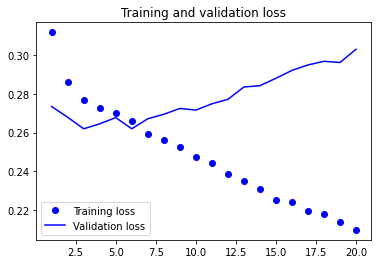

In [12]:
import matplotlib.pyplot as plt

loss = history.history['loss']
val_loss = history.history['val_loss']

epochs = range(1, len(loss) + 1)

plt.figure()

plt.plot(epochs, loss, 'bo', label='Training loss')
plt.plot(epochs, val_loss, 'b', label='Validation loss')
plt.title('Training and validation loss')
plt.legend()

plt.show()

In [13]:
# Adding regularization (recurrent dropout)
from keras.models import Sequential
from keras.layers import GRU, Dense
from tensorflow.keras.optimizers import RMSprop

model = Sequential()
model.add(GRU(32,
              dropout=0.2,
              recurrent_dropout=0.2,
              input_shape=(None, float_data.shape[-1])))
model.add(Dense(1))

model.compile(optimizer=RMSprop(),
              loss='mae')

history = model.fit(train_gen,
                    steps_per_epoch=500,
                    epochs=40,
                    validation_data=val_gen,
                    validation_steps=val_steps)

Epoch 1/40
500/500 [==============================] - 163s 321ms/step - loss: 0.3228 - val_loss: 0.2882
Epoch 2/40
500/500 [==============================] - 159s 319ms/step - loss: 0.3058 - val_loss: 0.2807
Epoch 3/40
500/500 [==============================] - 159s 319ms/step - loss: 0.2975 - val_loss: 0.2753
Epoch 4/40
500/500 [==============================] - 160s 320ms/step - loss: 0.2940 - val_loss: 0.2709
Epoch 5/40
500/500 [==============================] - 161s 322ms/step - loss: 0.2899 - val_loss: 0.2782
Epoch 6/40
500/500 [==============================] - 162s 324ms/step - loss: 0.2849 - val_loss: 0.2694
Epoch 7/40
500/500 [==============================] - 159s 318ms/step - loss: 0.2829 - val_loss: 0.2738
Epoch 8/40
500/500 [==============================] - 159s 317ms/step - loss: 0.2784 - val_loss: 0.2735
Epoch 9/40
500/500 [==============================] - 160s 320ms/step - loss: 0.2758 - val_loss: 0.2709
Epoch 10/40
500/500 [==============================] - 160s 320m

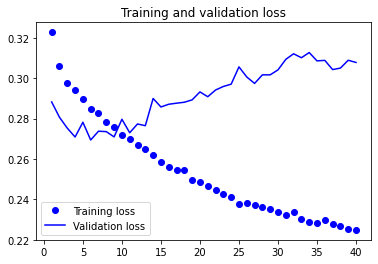

In [14]:
import matplotlib.pyplot as plt

loss = history.history['loss']
val_loss = history.history['val_loss']

epochs = range(1, len(loss) + 1)

plt.figure()

plt.plot(epochs, loss, 'bo', label='Training loss')
plt.plot(epochs, val_loss, 'b', label='Validation loss')
plt.title('Training and validation loss')
plt.legend()

plt.show()

## Multiple GRU layers

In [ ]:
from keras.models import Sequential
from keras.layers import GRU, Dense
from tensorflow.keras.optimizers import RMSprop

model = Sequential()
model.add(GRU(32,
              dropout=0.1,
              recurrent_dropout=0.5,
              return_sequences=True,
              input_shape=(None, float_data.shape[-1])))
model.add(GRU(64, activation='relu',
              dropout=0.1,
              recurrent_dropout=0.5))
model.add(Dense(1))

model.compile(optimizer=RMSprop(),
              loss='mae')

history = model.fit(train_gen,
                    steps_per_epoch=500,
                    epochs=40,
                    validation_data=val_gen,
                    validation_steps=val_steps)

In [ ]:
import matplotlib.pyplot as plt

loss = history.history['loss']
val_loss = history.history['val_loss']

epochs = range(1, len(loss) + 1)

plt.figure()

plt.plot(epochs, loss, 'bo', label='Training loss')
plt.plot(epochs, val_loss, 'b', label='Validation loss')
plt.title('Training and validation loss')
plt.legend()

plt.show()

## Bidirectional GRU

In [12]:
from keras.models import Sequential
from keras.layers import Bidirectional, GRU, Dense

model = Sequential()
model.add(Bidirectional(GRU(32), input_shape=(None, float_data.shape[-1])))
model.add(Dense(1))

model.compile(optimizer='rmsprop',
              loss='mae')

history = model.fit(train_gen,
                    steps_per_epoch=500,
                    epochs=40,
                    validation_data=val_gen,
                    validation_steps=val_steps)

Epoch 1/40
500/500 [==============================] - 24s 44ms/step - loss: 0.2992 - val_loss: 0.2680
Epoch 2/40
500/500 [==============================] - 22s 43ms/step - loss: 0.2778 - val_loss: 0.2710
Epoch 3/40
500/500 [==============================] - 21s 43ms/step - loss: 0.2719 - val_loss: 0.2651
Epoch 4/40
500/500 [==============================] - 21s 43ms/step - loss: 0.2642 - val_loss: 0.2676
Epoch 5/40
500/500 [==============================] - 21s 43ms/step - loss: 0.2583 - val_loss: 0.2650
Epoch 6/40
500/500 [==============================] - 22s 43ms/step - loss: 0.2533 - val_loss: 0.2629
Epoch 7/40
500/500 [==============================] - 22s 43ms/step - loss: 0.2467 - val_loss: 0.2663
Epoch 8/40
500/500 [==============================] - 22s 43ms/step - loss: 0.2403 - val_loss: 0.2684
Epoch 9/40
500/500 [==============================] - 22s 43ms/step - loss: 0.2350 - val_loss: 0.2763
Epoch 10/40
500/500 [==============================] - 21s 43ms/step - loss: 0.228

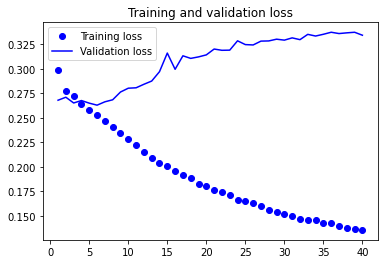

In [13]:
import matplotlib.pyplot as plt

loss = history.history['loss']
val_loss = history.history['val_loss']

epochs = range(1, len(loss) + 1)

plt.figure()

plt.plot(epochs, loss, 'bo', label='Training loss')
plt.plot(epochs, val_loss, 'b', label='Validation loss')
plt.title('Training and validation loss')
plt.legend()

plt.show()